In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

In [2]:
def get_column(data, index):
    result = [row[index] for row in data]

    return result

def prepare_data(file_name_dataset):
    data = np.genfromtxt(file_name_dataset, delimiter=',', skip_header=1).tolist()
    N = len(data)

    tv_data = get_column(data, 0)
    radio_data = get_column(data, 1)
    newspaper_data = get_column(data, 2)
    sales_data = get_column(data, 3)

    X = [tv_data, radio_data, newspaper_data]
    y = sales_data

    return X, y

In [3]:
# Question 1
X, y = prepare_data('advertising.csv')
list = [sum(X[0][:5]), sum(X[1][:5]), sum(X[2][:5]) , sum(y[:5])]
print(list)

[624.1, 175.1, 300.5, 78.9]


In [4]:
def initialize_params():
    w1 = random.gauss(mu=0.0, sigma =0.01)
    w2 = random.gauss(mu=0.0, sigma =0.01)
    w3 = random.gauss(mu=0.0, sigma =0.01)
    b = 0
    w1 , w2 , w3, b = (0.016992259082509283 , 0.0070783670518262355 ,-0.002307860847821344 , 0)
    return w1, w2 , w3, b

def compute_loss_mse(y, y_hat):
    loss = (y_hat -y)**2
    return loss

def predict(x1, x2 , x3, w1, w2 , w3 , b):
    y_hat = w1*x1 + w2*x2 + w3*x3 + b
    return y_hat

def compute_gradient_wi(x , y, y_hat):
    return 2*x*(y_hat - y)

def compute_gradient_b(y, y_hat):
    return 2*(y_hat - y)

def update_weight_wi(w, dl_dw , lr):
    return w - lr*dl_dw

def update_weight_b(b, dl_db , lr):
    return b - lr*dl_db

def implement_linear_regression(X_data, y_data, epoch_max=50, lr=1e-5):
    losses = []

    w1 , w2 , w3, b = initialize_params()

    N = len(y_data)

    for epoch in range(epoch_max):
        for i in range(N):
            # get a sample
            x1 = X_data[0][i]
            x2 = X_data[1][i]
            x3 = X_data[2][i]

            y = y_data[i]

            # compute output
            y_hat = predict(x1, x2, x3, w1, w2, w3, b)

            # compute loss
            loss = compute_loss_mse(y, y_hat)

            # compute gradient w1 , w2, w3, b
            dl_dw1 = compute_gradient_wi(x1 , y, y_hat)
            dl_dw2 = compute_gradient_wi(x2 , y, y_hat)
            dl_dw3 = compute_gradient_wi(x3 , y, y_hat)
            dl_db = compute_gradient_b(y, y_hat)

            #update parameters
            w1 = update_weight_wi(w1, dl_dw1 , lr)
            w2 = update_weight_wi(w2, dl_dw2 , lr)
            w3 = update_weight_wi(w3, dl_dw3 , lr)
            b = update_weight_b(b, dl_db , lr)
            
            # logging
            losses.append(loss)
    
    return (w1 ,w2 ,w3 ,b, losses)

In [5]:
# Question 2:
y = predict(x1=1, x2=1, x3=1, w1=0, w2=0.5, w3=0, b=0.5)
print(y)

1.0


In [6]:
# Question 3:
l = compute_loss_mse(y_hat=1, y=0.5)
l

0.25

In [7]:
# Question 4:
# MSE loss
g_wi = compute_gradient_wi(x=1.0, y=1.0, y_hat =0.5)
print(g_wi)

-1.0


In [8]:
# Question 5:
g_b = compute_gradient_b(y=2.0, y_hat =0.5)
print(g_b)

-3.0


In [9]:
# Question 6:
after_wi = update_weight_wi(w=1.0, dl_dw =-0.5, lr = 1e-5)
print(after_wi)

1.000005


In [10]:
# Question 7:
after_b = update_weight_b(b=0.5, dl_db=-1.0, lr = 1e-5)
print(after_b)

0.50001


In [12]:
X, y = prepare_data('advertising.csv')

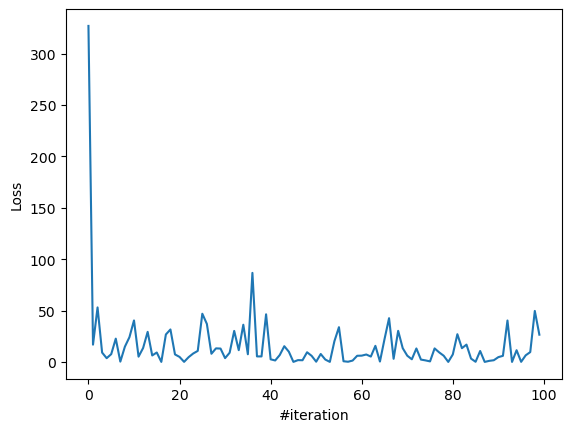

In [13]:
(w1 ,w2 ,w3 ,b, losses) = implement_linear_regression(X,y)
plt.plot(losses [:100])
plt.xlabel("#iteration")
plt.ylabel("Loss")
plt.show()

In [14]:
# Question 8:
X,y = prepare_data('advertising.csv')
(w1 ,w2 ,w3 ,b, losses) = implement_linear_regression(X,y)
print(w1 , w2, w3)

0.07405984066396477 0.15917360263437663 0.017561197559948935


In [15]:
# Question 9:
# given new data
tv = 19.2
radio = 35.9
newspaper = 51.3
X,y = prepare_data('advertising.csv')
(w1 ,w2 ,w3 ,b, losses) = implement_linear_regression(X, y, epoch_max =50, lr=1e-5)
sales = predict(tv, radio , newspaper , w1 , w2, w3, b)
print(f'predicted sales is {sales}')

predicted sales is 8.176413319549823


In [16]:
def compute_loss_mae(y_hat, y):
    return abs(y_hat - y)

In [18]:
# Question 10:
l = compute_loss_mae(y_hat=1, y=0.5)
print(l)

0.5


In [17]:
def implement_linear_regression(X_data, y_data, epoch_max=50, lr=1e-5):
    losses = []

    w1 , w2 , w3, b = initialize_params()

    N = len(y_data)

    for epoch in range(epoch_max):
        for i in range(N):
            # get a sample
            x1 = X_data[0][i]
            x2 = X_data[1][i]
            x3 = X_data[2][i]

            y = y_data[i]

            # compute output
            y_hat = predict(x1, x2, x3, w1, w2, w3, b)

            # compute loss
            loss = compute_loss_mae(y, y_hat)

            # compute gradient w1 , w2, w3, b
            dl_dw1 = compute_gradient_wi(x1 , y, y_hat)
            dl_dw2 = compute_gradient_wi(x2 , y, y_hat)
            dl_dw3 = compute_gradient_wi(x3 , y, y_hat)
            dl_db = compute_gradient_b(y, y_hat)

            #update parameters
            w1 = update_weight_wi(w1, dl_dw1 , lr)
            w2 = update_weight_wi(w2, dl_dw2 , lr)
            w3 = update_weight_wi(w3, dl_dw3 , lr)
            b = update_weight_b(b, dl_db , lr)
            
            # logging
            losses.append(loss)
    
    return (w1 ,w2 ,w3 ,b, losses)

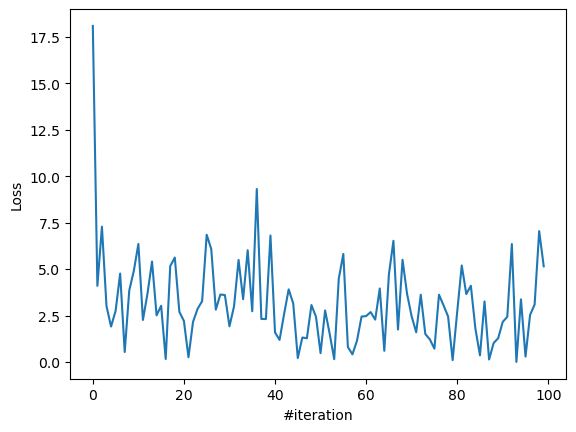

In [19]:
(w1 ,w2 ,w3 ,b, losses) = implement_linear_regression(X,y)
plt.plot(losses [:100])
plt.xlabel("#iteration")
plt.ylabel("Loss")
plt.show()

In [20]:
def implement_linear_regression_nsamples(X_data, y_data, epoch_max=50, lr=1e-5):
    losses = []

    w1 , w2 , w3, b = initialize_params()
    N = len(y_data)

    for epoch in range(epoch_max):

        loss_total = 0
        dw1_total = 0
        dw2_total = 0
        dw3_total = 0
        db_total = 0

        for i in range(N):
            # get a sample
            x1 = X_data[0][i]
            x2 = X_data[1][i]
            x3 = X_data[2][i]

            y = y_data[i]

            # compute output
            y_hat = predict(x1, x2, x3, w1, w2, w3, b)

            # compute loss
            loss = compute_loss_mse(y, y_hat)

            # accumulate loss
            loss_total += loss

            # compute gradient w1 , w2, w3, b
            dl_dw1 = compute_gradient_wi(x1 , y, y_hat)
            dl_dw2 = compute_gradient_wi(x2 , y, y_hat)
            dl_dw3 = compute_gradient_wi(x3 , y, y_hat)
            dl_db = compute_gradient_b(y, y_hat)

            # accumulate gradient w1 , w2, w3, b
            dw1_total += dl_dw1 
            dw2_total += dl_dw2
            dw3_total += dl_dw3 
            db_total += dl_db

        #update parameters 
        w1 = update_weight_wi(w1, dw1_total/N , lr)
        w2 = update_weight_wi(w2, dw2_total/N , lr)
        w3 = update_weight_wi(w3, dw3_total/N , lr)
        b = update_weight_b(b, db_total/N , lr)
            
        # logging
        losses.append(loss_total/N)
    
    return (w1 ,w2 ,w3 ,b, losses)

[172.98395547828923, 39.4081674745134, 18.15746728564735, 14.634633779162357, 13.913880074022757, 13.640049637323427, 13.441395294810789, 13.259118517018994, 13.083802587178743, 12.913826664416215, 12.748804182322559, 12.58854742072041, 12.432904005847659, 12.281730988201284, 12.134890631437667, 11.992249630675893, 11.853678875589457, 11.719053303032835, 11.588251767260099, 11.461156916275085, 11.33765507239911, 11.217636116651946, 11.100993376782947, 10.987623518830576, 10.877426442098113, 10.77030517743778, 10.666165788738786, 10.564917277518694, 10.466471490519933, 10.370743030217112, 10.277649168143098, 10.187109760945372, 10.099047169086274, 10.013386178104167, 9.930053922354572, 9.848979811153313, 9.770095457245782, 9.69333460752933, 9.61863307595747, 9.545928678557278, 9.475161170493593, 9.406272185115144, 9.339205174920474, 9.273905354383018, 9.210319644576826, 9.148396619546123, 9.088086454363877, 9.029340874825948, 8.972113108729593, 8.916357838686066, 8.86203115641928, 8.809

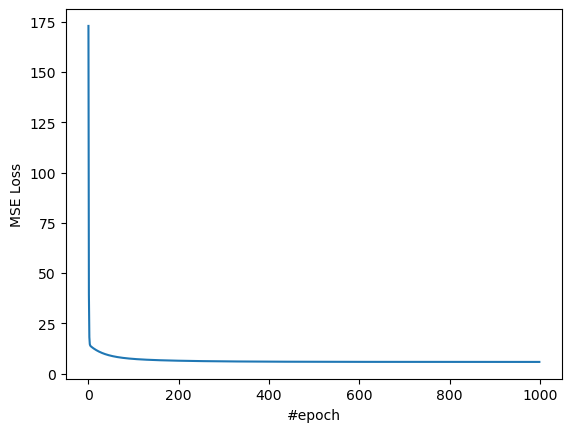

In [21]:
(w1 ,w2 ,w3 ,b, losses) = implement_linear_regression_nsamples(X, y, epoch_max =1000, lr=1e-5)
print(losses)
plt.plot(losses)
plt.xlabel("#epoch")
plt.ylabel("MSE Loss")
plt.show()

In [22]:
# Question 11:
X,y = prepare_data('advertising.csv')
#using MSE loss
(w1 ,w2 ,w3 ,b, losses) = implement_linear_regression_nsamples(X, y, epoch_max =1000, lr=1e-5)
print(w1 ,w2 ,w3)

0.06710990754044266 0.15756173831487585 0.029619799386084403


[172.98395547828923, 39.4081674745134, 18.15746728564735, 14.634633779162357, 13.913880074022757, 13.640049637323427, 13.441395294810789, 13.259118517018994, 13.083802587178743, 12.913826664416215, 12.748804182322559, 12.58854742072041, 12.432904005847659, 12.281730988201284, 12.134890631437667, 11.992249630675893, 11.853678875589457, 11.719053303032835, 11.588251767260099, 11.461156916275085, 11.33765507239911, 11.217636116651946, 11.100993376782947, 10.987623518830576, 10.877426442098113, 10.77030517743778, 10.666165788738786, 10.564917277518694, 10.466471490519933, 10.370743030217112, 10.277649168143098, 10.187109760945372, 10.099047169086274, 10.013386178104167, 9.930053922354572, 9.848979811153313, 9.770095457245782, 9.69333460752933, 9.61863307595747, 9.545928678557278, 9.475161170493593, 9.406272185115144, 9.339205174920474, 9.273905354383018, 9.210319644576826, 9.148396619546123, 9.088086454363877, 9.029340874825948, 8.972113108729593, 8.916357838686066, 8.86203115641928, 8.809

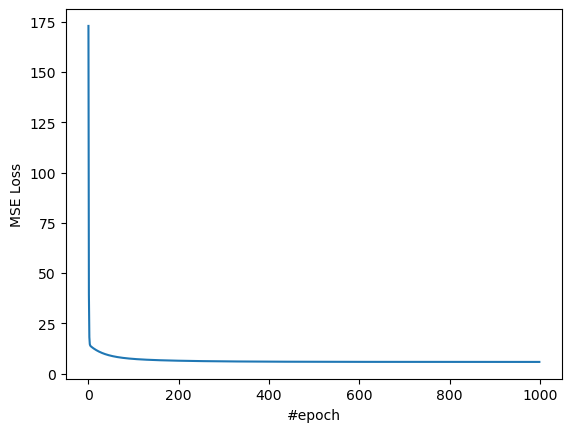

In [23]:
(w1 ,w2 ,w3 ,b, losses) = implement_linear_regression_nsamples(X, y, epoch_max =1000, lr=1e-5)
print(losses)
plt.plot(losses)
plt.xlabel("#epoch")
plt.ylabel("MSE Loss")
plt.show()

In [111]:
def prepare_data(file_name_dataset):
    data = np.genfromtxt(file_name_dataset , delimiter=',', skip_header =1).tolist()

    tv_data = get_column(data , 0)
    radio_data = get_column(data , 1)
    newspaper_data = get_column(data , 2)
    
    sales_data = get_column(data , 3)
    
    # building X input and y output for training
    # Create list of features for input
    X = [[1, x1, x2 , x3] for x1, x2 , x3 in zip(tv_data , radio_data , newspaper_data)]
    y = sales_data
    return X, y
X,y = prepare_data('advertising.csv')

In [110]:
def initialize_params ():
    bias = 0
    w1 = random.gauss(mu=0.0, sigma =0.01)
    w2 = random.gauss(mu=0.0, sigma =0.01)
    w3 = random.gauss(mu=0.0, sigma =0.01)

    # return [bias , w1 , w2, w3]
    return [0, -0.01268850433497871 , 0.004752496982185252 , 0.0073796171538643845]

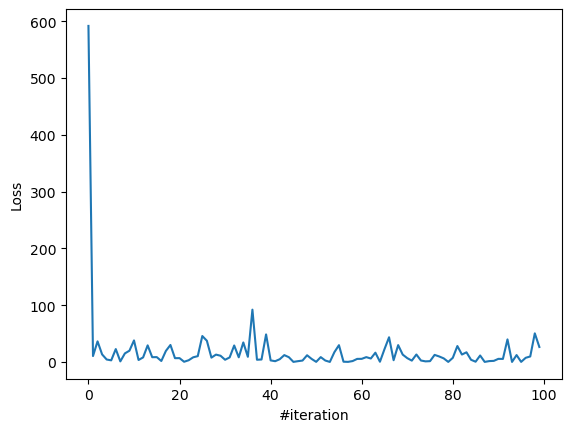

In [141]:
#Predict output by using y = x0*b + x1*w1 + x2*w2 + x3*w3

def predict(X_features , weights):
    y_hat = 0 
    for i in range(len(X_features)):
        y_hat += X_features[i]*weights[i]

    return y_hat

def compute_loss(y_hat , y):
    return (y_hat - y)**2

def compute_gradient_w(X_features , y, y_hat):
    dl_dweights=[2*feature*(y_hat - y) for feature in X_features]
    return dl_dweights

def update_weight(weights , dl_dweights , lr):
    for i in range(len(weights)):
        weights[i] -= lr*dl_dweights[i]
    return weights

def implement_linear_regression(X_feature , y_ouput , epoch_max =50,lr=1e-5):
    losses = []
    weights = initialize_params()
    N = len(y_ouput)
    for epoch in range(epoch_max):
        for i in range(N):
        # get a sample - row i
            features_i = X_feature[i]
            y = y_ouput[i]

            # compute output
            y_hat = predict(features_i , weights)

            # compute loss
            loss = compute_loss(y, y_hat)

            # compute gradient w1 , w2, w3, b
            dl_dweights = compute_gradient_w(features_i , y, y_hat)


            # update parameters
            weights = update_weight(weights , dl_dweights , lr)

            # logging
            losses.append(loss)
    return weights , losses

X,y = prepare_data('advertising.csv')
W,L = implement_linear_regression(X,y)
plt.plot(L[0:100])
plt.xlabel("#iteration")
plt.ylabel("Loss")
plt.show()

In [142]:
# Question 12:
L[9999]

31.339223408109948